In [3]:
#Import all the libraries to prefom data anlysis.
import pandas as pd #Pandas is used to to apply operations on datafram.
import numpy as np #Numpy is numerical python use to perform mathematical operations.
import matplotlib.pyplot as plt #Used for visualization
import seaborn as sns #used for visulaization
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Importing the airbnb_new_york dataset to the variable name df using pandas.
df=pd.read_csv('ab_nyc_2019.csv', encoding='latin1')

In [5]:
#Printing the first 5 rows of the dataframe.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [6]:
#Below code returns the number of rows and columns availbale in the dataframe.
df.shape

(48895, 16)

In [7]:
#.info() return the datatype and availability of any null values in any column of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#Below code is provides no. of elements, min, max, standard devition and other quantile values.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
#isnull() is used to know if there is any null values.
#if one any() is used the it will return null value availibility of each column and twice is used to know for the wholw dataframe.
df.isnull().any().any()

True

In [10]:
#.sum() return the number of null values present in the columns.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the above detail we can see that name, host_name, last_value and reviews_per_month has some null values which if used will give wrong prediction or forecasting.

In [11]:
#Here we are deleting latitude. longitude, last_review & reviews_per_month columns to get the optimal analysis of the dataframe.
df.drop(['latitude', 'longitude','last_review','reviews_per_month'], inplace=True, axis=1)

In [12]:
#again printing first 10 rows to check if those columns are deleted or not.
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188


In [13]:
#Deleting remaining null values form name & host_name columns.
df.dropna(inplace=True)

In [14]:
#again checking the number of rows and columns of the data after completing the cleaning part.
df.shape

(48858, 12)

# Visualization

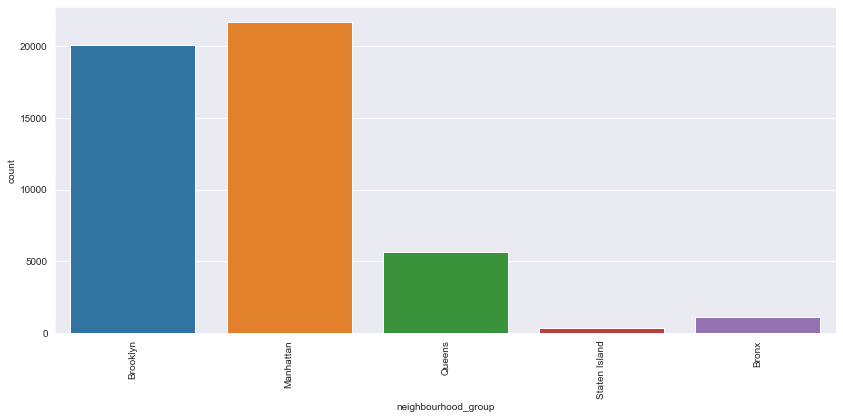

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 6))
plt.xticks(rotation = 90)
sns.countplot(df['neighbourhood_group'])

 The above figure shows that people are opting more for Manhattan and Broklyn as compared to Queens, Staten Island and Bronx

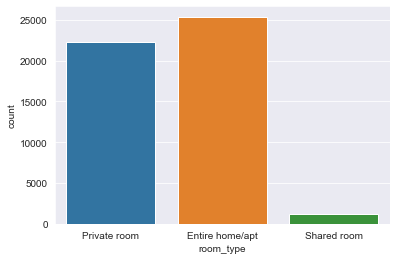

In [16]:
sns.countplot(df['room_type'])

Above figure clearly states that peoples don't want shared rooms, they want either a private room or a complete home/apt room_type

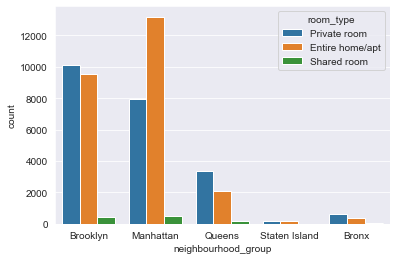

In [17]:
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)

Already visulized that Manhattan is prefeered more but only in Manahattan peoples are preferring entire home/Apartment more than private, shared room as compared to other cities where private rooms are more preferred.

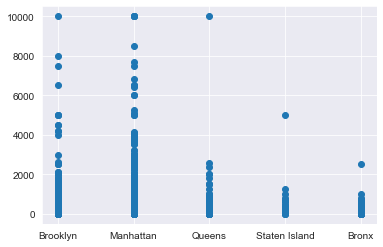

In [18]:
plt.scatter(x='neighbourhood_group', y='price', data=df )

Manhattan, Broklyn and Queen have the maximum price of 10000 but Staten Island and Bronx have 5000 and 2250 respectively.

In [19]:
#In the below code we are using groupby() function so that every category present inside the neighborhood_group cloumn
#can be made into individual unit with all its other values to be transformed into their sum or with their mean values.
df_agg = df.groupby(['neighbourhood_group'])
price=df_agg['price'].agg(np.sum)
number_of_reviews=df_agg['number_of_reviews'].agg(np.mean)
minimum_nights=df_agg['minimum_nights'].agg(np.mean)

Text(0, 0.5, 'Mean Number of Reviews')

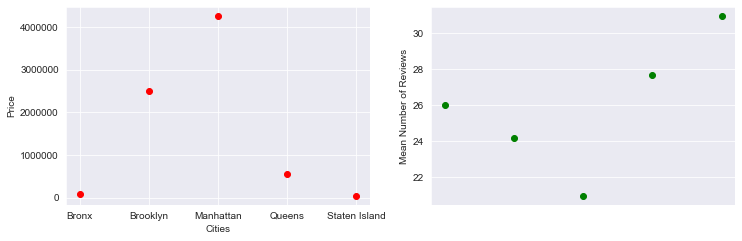

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.plot(price, 'ro')
plt.ylabel('Price')
plt.xlabel('Cities')

plt.subplot(222)
plt.plot(number_of_reviews, 'go')
plt.xticks('Cities')
plt.ylabel('Mean Number of Reviews')

We have already visualized that peoples are visiting Manhattan more so the hottel room expending is also more in Manhattan as shown in figure 1 but from the 2nd figure we can see that the mean reviews of Manhattan is also very low and Sataten Island has very high reviews.

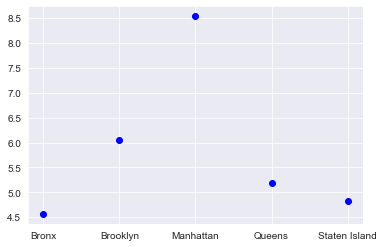

In [21]:
plt.plot(minimum_nights, 'bo')

Above figure shows people are spending more nights in Manhattan with the average of 8.5

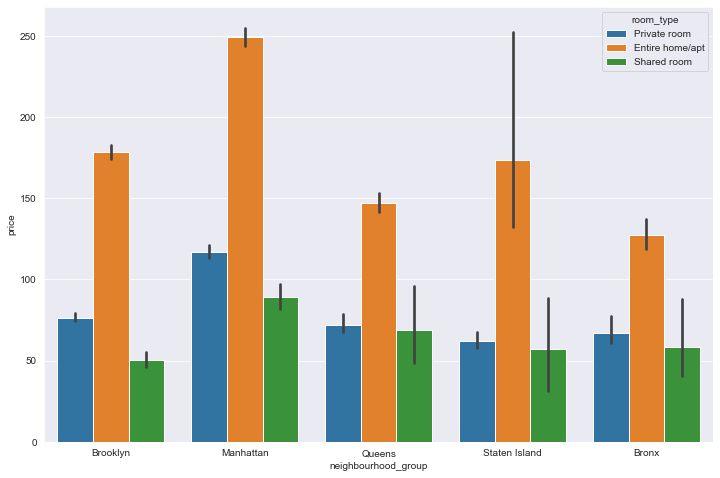

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood_group', y='price',hue='room_type', data=df)

Peoples are also spending more for entire room/Apartment as compared to private room or shred ones.

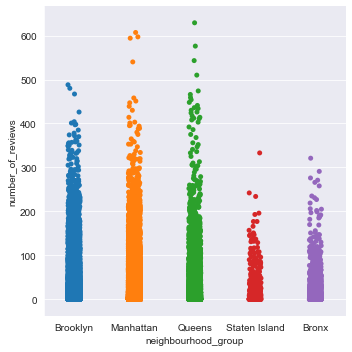

In [23]:
sns.catplot(x='neighbourhood_group', y='number_of_reviews', data=df)

In [24]:
df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188


In [25]:
df1= df.drop(['id', 'name', 'host_id', 'host_name', 'number_of_reviews','calculated_host_listings_count','availability_365'], axis=1)

In [26]:
df1.head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights
0,Brooklyn,Kensington,Private room,149,1
1,Manhattan,Midtown,Entire home/apt,225,1
2,Manhattan,Harlem,Private room,150,3
3,Brooklyn,Clinton Hill,Entire home/apt,89,1
4,Manhattan,East Harlem,Entire home/apt,80,10
5,Manhattan,Murray Hill,Entire home/apt,200,3
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45
7,Manhattan,Hell's Kitchen,Private room,79,2
8,Manhattan,Upper West Side,Private room,79,2
9,Manhattan,Chinatown,Entire home/apt,150,1


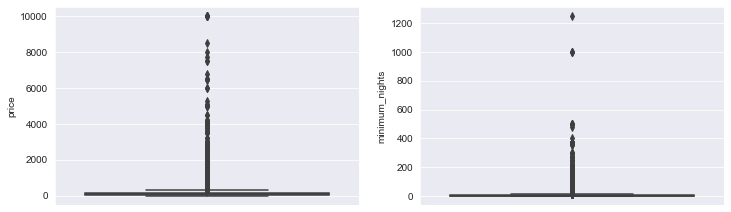

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(y='price', data=df1)

plt.subplot(222)
sns.boxplot(y='minimum_nights', data=df1)

In [28]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

IQR = Q3-Q1

print(IQR)

price             106.0
minimum_nights      4.0
dtype: float64


In [29]:
print(df['price'].quantile(0.25))
print(df['price'].quantile(0.75))

69.0
175.0


In [30]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
df.shape

(48858, 12)

In [32]:
df_out.shape

(39703, 12)

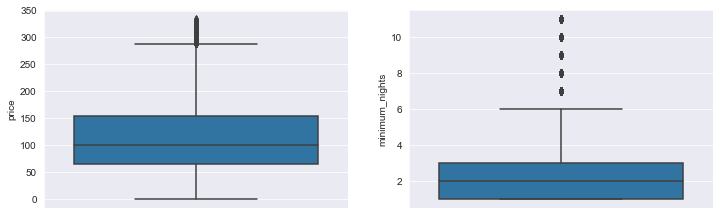

In [33]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(y='price', data=df_out)

plt.subplot(222)
sns.boxplot(y='minimum_nights', data=df_out)

In [34]:
Q_1 = df_out.quantile(0.25)
Q_3 = df_out.quantile(0.75)

IQR_new = Q_3-Q_1

In [35]:
df_out_new = df_out[~((df_out < (Q_1 - 1.5 * IQR_new)) |(df_out > (Q_1 + 1.5 * IQR_new))).any(axis=1)]

In [36]:
df_out_new.shape

(14640, 12)

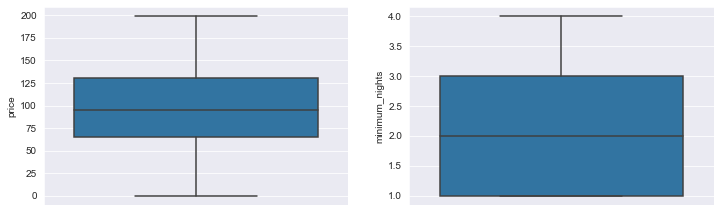

In [37]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(y='price', data=df_out_new)

plt.subplot(222)
sns.boxplot(y='minimum_nights', data=df_out_new)

In [38]:
df_out_new.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,1.464000e+04,1.464000e+04,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000
mean,1.787644e+07,3.588630e+07,100.616462,2.120219,8.075478,1.146721,27.796653
std,9.864762e+06,3.723206e+07,43.498118,0.998681,10.321115,0.353840,57.139004
min,8.505000e+03,3.151000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.531438e+06,7.009014e+06,65.000000,1.000000,1.000000,1.000000,0.000000
50%,1.779341e+07,2.251161e+07,95.000000,2.000000,4.000000,1.000000,0.000000
75%,2.566793e+07,5.100211e+07,130.000000,3.000000,11.000000,1.000000,20.000000
max,3.648506e+07,1.514604e+08,199.000000,4.000000,43.000000,2.000000,268.000000


In [39]:
df_out_new.drop(['id', 'name', 'host_id', 'host_name', 'number_of_reviews', 'calculated_host_listings_count', 
                 'availability_365', 'neighbourhood_group'], inplace=True, axis=1)

In [40]:
df_out_new

,neighbourhood,room_type,price,minimum_nights
25,Windsor Terrace,Private room,60,1
26,Inwood,Private room,80,4
48,Bedford-Stuyvesant,Entire home/apt,115,3
60,Williamsburg,Private room,80,2
88,East Village,Private room,50,1
...,...,...,...,...
48869,Bedford-Stuyvesant,Private room,45,4
48870,Williamsburg,Entire home/apt,99,4
48889,Jamaica,Private room,65,1
48890,Bedford-Stuyvesant,Private room,70,2


In [41]:
lbl = LabelEncoder()
df_out_new['neighbourhood']=lbl.fit_transform(df_out_new['neighbourhood'])
df_out_new['room_type']=lbl.fit_transform(df_out_new['room_type'])

In [42]:
df_out_new

,neighbourhood,room_type,price,minimum_nights
25,197,1,60,1
26,95,1,80,4
48,13,0,115,3
60,196,1,80,2
88,61,1,50,1
...,...,...,...,...
48869,13,1,45,4
48870,196,0,99,4
48889,97,1,65,1
48890,13,1,70,2


In [43]:
X = df_out_new.drop('price', axis=1)
X = X.apply(zscore)
y = df_out_new.price

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [45]:
model = KNeighborsClassifier(n_neighbors=121)
fittedmodel = model.fit(X_train, y_train)
y_pred = fittedmodel.predict(X_test)

In [46]:
print(accuracy_score(y_pred, y_test))

0.08173952641165756


In [47]:
model1 = DecisionTreeClassifier().fit(X_train, y_train)
pred = model1.predict(X_test)

In [48]:
print(accuracy_score(pred, y_test))

0.07832422586520947


In [49]:
data = pd.DataFrame({"Actual": y_test, 'Predicted': y_pred})
data

,Actual,Predicted
28805,79,65
35583,75,55
44804,150,100
20725,150,150
25144,35,50
...,...,...
6448,60,50
28618,149,150
18196,159,150
1994,95,150


In [51]:
data1 = pd.DataFrame({"Actual": y_test, 'Predicted': pred})
data1

,Actual,Predicted
28805,79,65
35583,75,55
44804,150,120
20725,150,150
25144,35,56
...,...,...
6448,60,50
28618,149,160
18196,159,150
1994,95,150


In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
maxK = int(np.sqrt(X_train.shape[0]))
maxK

101

In [54]:
myList = list(range(1,102))
myList

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101]

In [55]:
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#It is advisible to take odd values for binary classification to avoid the ties i.e. two classes labels achieving
#the same score.

neighbors 

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101]

In [56]:
# empty list that will hold cv scores
cv_scores = []

In [57]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [58]:
misError = [1 - x for x in cv_scores]


In [59]:
optimal_k = neighbors[misError.index(min(misError))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 63


In [60]:
NNH = KNeighborsClassifier(n_neighbors=optimal_k)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=63, p=2,
                     weights='uniform')

In [61]:
p = NNH.predict(X_test)

In [62]:
print(accuracy_score(p, y_test))

0.07764116575591985
